In [12]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import math

df = pd.read_csv("../results/validation_tagged_claude.csv")

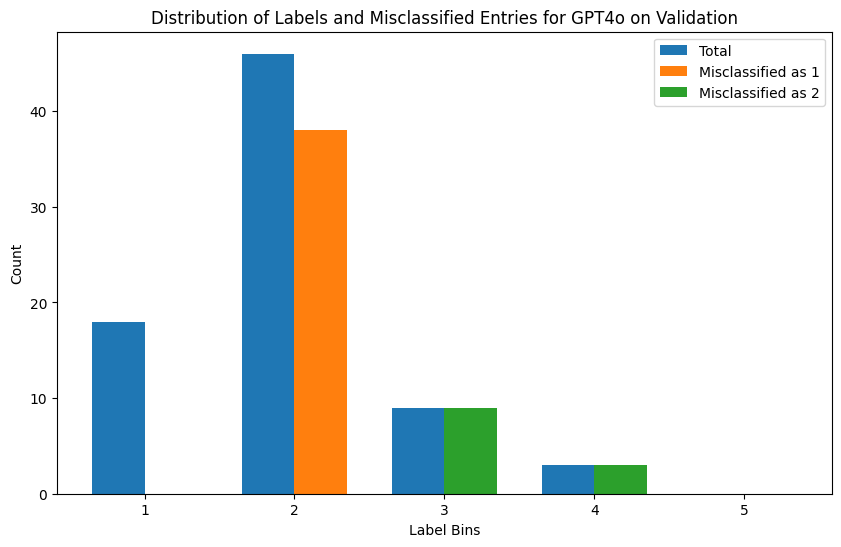

In [10]:
# Assuming 'Prediction' column exists in the dataframe

# Create a new column to identify misclassified entries
pred_col = 'zero_shot_4o'
df['Misclassified'] = df['Label'] != df[pred_col]

# Create bins for the 'Label' values
bins = [0, 1, 2, 3, 4, 5]
labels = ['1', '2', '3', '4', '5']
df['Label_Binned'] = pd.cut(df['Label'], bins=bins, labels=labels, include_lowest=True)

# Group by the bins and count the number of entries and misclassified entries
grouped = df.groupby('Label_Binned').agg({'Label': 'count'}).reset_index()
grouped.columns = ['Label_Binned', 'Total']

# Create a pivot table to count misclassified predictions for each label bin
misclassified_pivot = df[df['Misclassified']].pivot_table(index='Label_Binned', columns=pred_col, aggfunc='size', fill_value=0)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(grouped))

# Plot total counts
bar1 = ax.bar(index, grouped['Total'], bar_width, label='Total')

# Plot misclassified counts as stacked bars
bottom = np.zeros(len(grouped))
for col in misclassified_pivot.columns:
    bar = ax.bar(index + bar_width, misclassified_pivot[col], bar_width, bottom=bottom, label=f'Misclassified as {col}')
    bottom += misclassified_pivot[col]

ax.set_xlabel('Label Bins')
ax.set_ylabel('Count')
ax.set_title('Distribution of Labels and Misclassified Entries for GPT4o on Validation')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(grouped['Label_Binned'])
ax.legend()

plt.show()


In [17]:
from langchain import PromptTemplate, LLMChain
from langchain.llms import OpenAI
from langchain.prompts.few_shot import FewShotPromptTemplate
from langchain.prompts.prompt import PromptTemplate

# Initialize the language model
llm = OpenAI(temperature=0.9)

sentiment_examples = [
    {"input": "Yes, so attention mechanism is a machine learning based mechanism that mimics cognitive attention. So this allows machine learning models to focus on specific parts of the input data. With varying levels of importance given to different elements in the sequence.", "output": "Higher"}
]

sentiment_example_template = """
Text: {input}
Quality: {output}
"""

sentiment_example_prompt = PromptTemplate(
    input_variables=["input", "output"],
    template=sentiment_example_template
)

# Quality in this case depends on both the accuracy and clarity of the technical solution described as well as how appropriate it is for the use case. 

sentiment_few_shot_prompt = FewShotPromptTemplate(
    examples=sentiment_examples,
    example_prompt=sentiment_example_prompt,
    prefix="Classify the quality of the following texts as Lowest or Higher:",
    suffix="Text: {input}\n Quality:",
    input_variables=["input"],
    example_separator="\n\n"
)

sentiment_chain = sentiment_few_shot_prompt | llm 

sentiment_texts = [
    "In web scraping, I have faced multiple challenges. I will describe each one in detail earlier first. We are used to scrape any very few sites like not to sites and scraping them is they are just static Pages like basic HTML if you load the website, you'll get the HTML you can just scrape it from there. But with the with the number of parties that are growing with the chatbot and the company we need to scrape multiple websites and each website comes in different formats. So I'm asked static websites some come as an infinite scroll upside and some commas like toggle ones like you have to use some feature like sidebar or something to scroll between the news articles. So yeah, what have done at this time was I used to study how these website is frame. Like what is the essential HTML structure that is followed and how is the class structure given to each component in the website and if there is any common class, how can you differentiate? Particular content I want from other ones which share this common class like using other properties or Keys available in the HTML tag and some kind of that. I had landed through debugging the site and doing some test runs and in finance clothing have done that with the puppeteer. Failure. We used access for simple scripting which doesn't work. Then we shifted to Puppeteer and when we shifted to Puppeteer when we automated this whole scraping and cleaning and everything process, we Face difficulties because of multi-threading what happened what used to happen was there used to be the scraper used to work on some websites. And if any website is loading slow, it used to exit after 30 seconds and it will not address it again. So then I resist about what are the other ways we can do then I got to know about Puppeteer clusters, which is essentially you open fights in a chrome instance and do balance scraping which increases the speed of scraping and also that also has a feature of sending back to the cube suppose if any site is a or any subside in a website, which we are supposed to scrape. He's a not loading fast. It could be due to network reason or it could be due to the server problem at the website holder itself What we have done was if any exception has happened during the scraping. We used to recent back into the cluster. So this class thank you maintains a list of URLs. It needs to scrape and when something is filled it is added back to the scraping happens until this all these URLs are scraped safely and embedded into the database and that is one difficult. I saw the property clusters and a we used to scrape only static sites, and then I converted into scrolling sites and INF. school websites, these are all I just done with Puppeteer and various extensions it has", # L4 P3
    "Okay. So all of the information that is stored all of the user information specifically is stored in an encrypted database. The encryption is done using the asset 64 method, which is inbuilt in Django. The SS 64 takes up a lot of space but that's why we use AWS services to host our services. Yes apart from that. No other features has been used but the payment details are flushed out every 10 minutes. So as to not keep any record of the user's details", # L1 P4
    "Okay. So basically what we are doing is we are hosting our own mlflow Service mlflow as a service. So in mlflow what we do is we try to log artifacts for each of our run and it will be stored in our backend. So whenever we want we'll just load that particular artifact whenever you want to replicate so it's like just logged in some database kind of", # L2 P3
]

for text in sentiment_texts:
    sentiment = sentiment_chain.invoke(text)
    print(f"Text: {text}")
    print(f"Quality: {sentiment.strip()}\n")

Text: In web scraping, I have faced multiple challenges. I will describe each one in detail earlier first. We are used to scrape any very few sites like not to sites and scraping them is they are just static Pages like basic HTML if you load the website, you'll get the HTML you can just scrape it from there. But with the with the number of parties that are growing with the chatbot and the company we need to scrape multiple websites and each website comes in different formats. So I'm asked static websites some come as an infinite scroll upside and some commas like toggle ones like you have to use some feature like sidebar or something to scroll between the news articles. So yeah, what have done at this time was I used to study how these website is frame. Like what is the essential HTML structure that is followed and how is the class structure given to each component in the website and if there is any common class, how can you differentiate? Particular content I want from other ones whic

In [16]:
df = pd.read_csv("../data/train_valid_all.csv")
misclassified_df = df[df["Label"] != df["Prediction"]]
misclassified_df = misclassified_df[["Question", "Response", "Label",  "Prediction"]]
misclassified_df.to_csv("../data/train_valid_misclassified.csv", index=False)
